# Think Bayes

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import pandas as pd

from scipy.stats import poisson, norm

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Joint

import thinkbayes2
import thinkplot

### Fake data

In [2]:
slope = 2
inter = 1
sigma = 0.3

0.3

In [3]:
xs = np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [4]:
ys = inter + slope * xs + np.random.normal(0, sigma, len(xs))

array([0.61705657, 1.53799608, 1.9792871 , 2.12953544, 2.08123191,
       3.13484205])

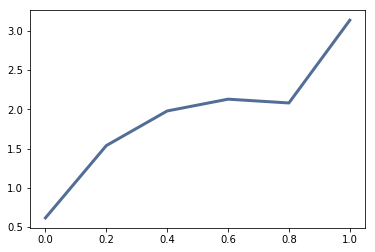

In [5]:
thinkplot.plot(xs, ys)

### Grid algorithm

In [23]:
class Regress(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: x, y
        hypo: slope, inter, sigma
        """
        x,y=data
        slope,inter,sigma=hypo
        return norm(slope*x+inter,sigma).pdf(y)

In [7]:
# Solution goes here

In [8]:
params = np.linspace(-4, 4, 21)

array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
        0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ])

In [9]:
sigmas = np.linspace(0.1, 2, 20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [10]:
from itertools import product
hypos = product(params, params, sigmas)

In [11]:
suite = Regress(hypos);

In [24]:
for data in zip(xs, ys):
    suite.Update(data)

In [13]:
suite.Total()

1.000000000000002

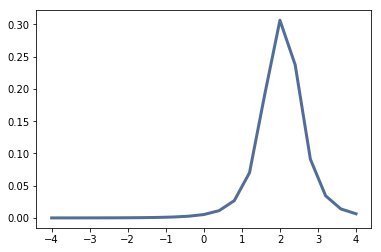

In [14]:
thinkplot.Pdf(suite.Marginal(0))

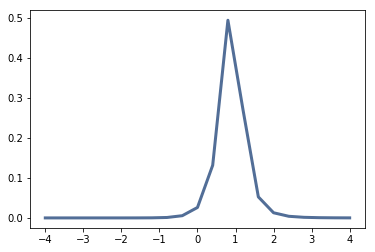

In [15]:
thinkplot.Pdf(suite.Marginal(1))

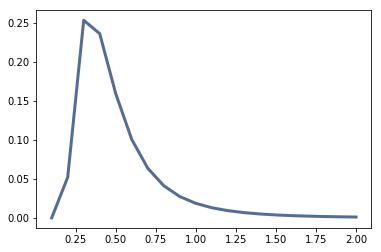

In [16]:
thinkplot.Pdf(suite.Marginal(2))

### MCMC

Implement this model using MCMC

In [30]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.5


In [34]:
model = pm.Model()

with model:
    sigma = pm.HalfNormal('sigma',sd=1)
    m     = pm.Normal('m',mu=0,sd=10)
    b     = pm.Normal('b',mu=0,sd=10)
    y     = b + m*xs
    yObs  = pm.Normal('yObs',mu=y,sd=sigma,observed=ys)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, m, sigma]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1305.86draws/s]
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f793367e668>,
      dtype=object)

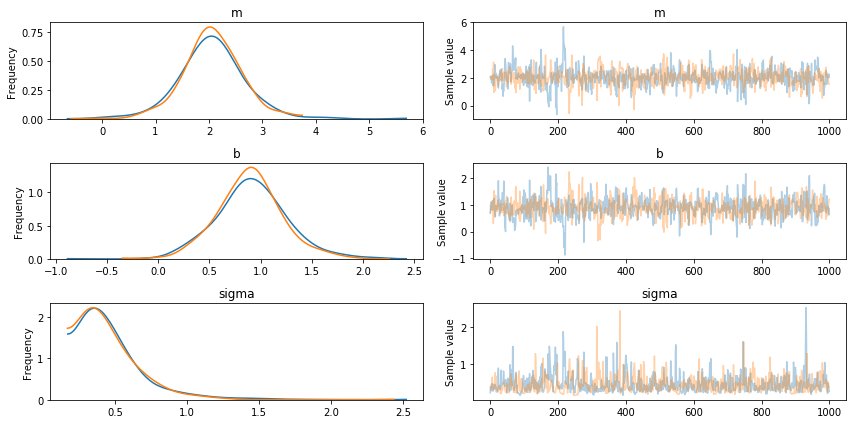

In [35]:
pm.traceplot(trace)